In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
df= pd.read_csv(r"C:\Users\Lenovo\Veri-Analizi-2\datasets\starbucks.csv",index_col=0)

In [4]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [6]:
df.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [7]:
df["item"].nunique()

77

In [9]:
df["item"].unique()

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [10]:
df["type"].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [11]:
df.groupby("type")["item"].count()

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

Text(0.0, 50, 'ürün kategori yelpazesi')

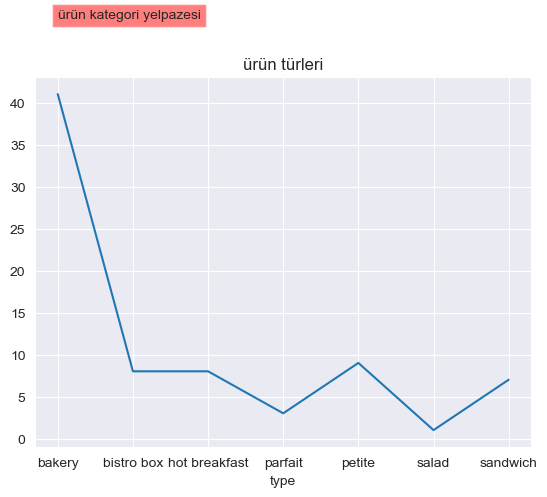

In [13]:
df.groupby("type")["item"].count().plot()
plt.title("ürün türleri")
plt.text(0.,50, "ürün kategori yelpazesi",bbox=dict(facecolor="red",alpha=0.5))

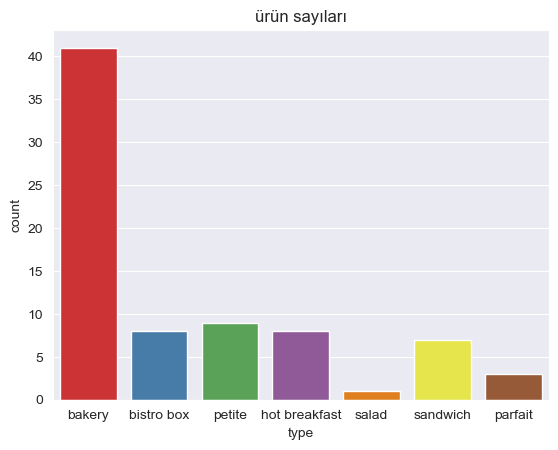

In [15]:
sns.countplot(x="type",data=df,palette="Set1")
plt.title("ürün sayıları")
plt.show()

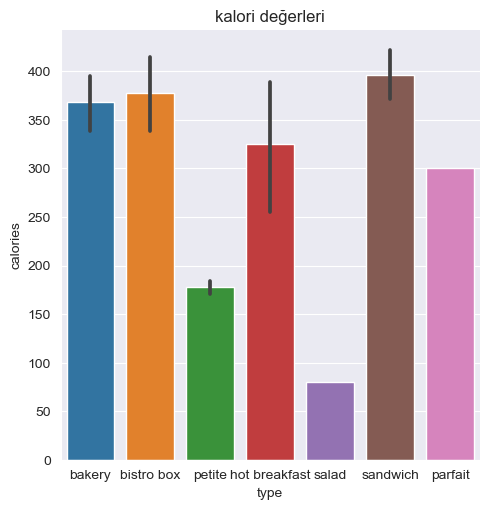

In [17]:
sns.catplot(kind="bar",x="type",y="calories",data=df)
plt.title("kalori değerleri")
plt.show()

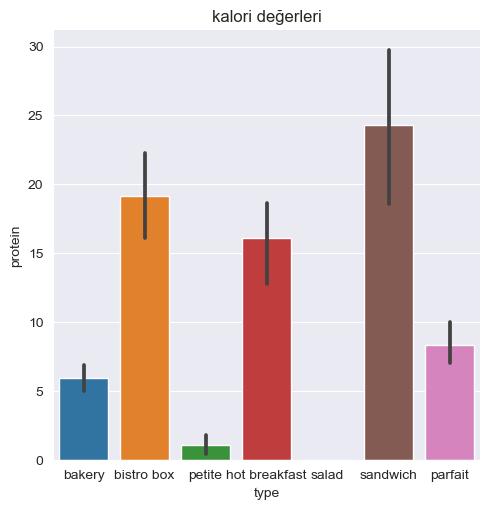

In [18]:
sns.catplot(kind="bar",x="type",y="protein",data=df)
plt.title("kalori değerleri")
plt.show()

In [19]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8636\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8636\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

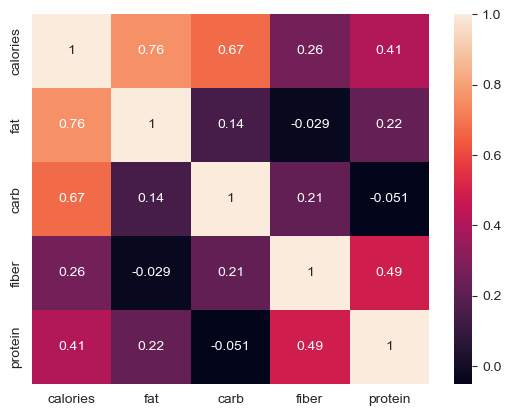

In [21]:
sns.heatmap(df.corr(),annot=True)

[]

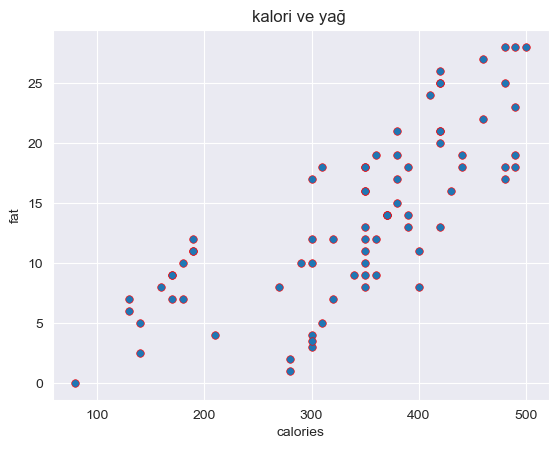

In [23]:
plt.title("kalori ve yağ ")
sns.scatterplot(x="calories",y="fat",data=df,s=30,edgecolor="red")
plt.plot()

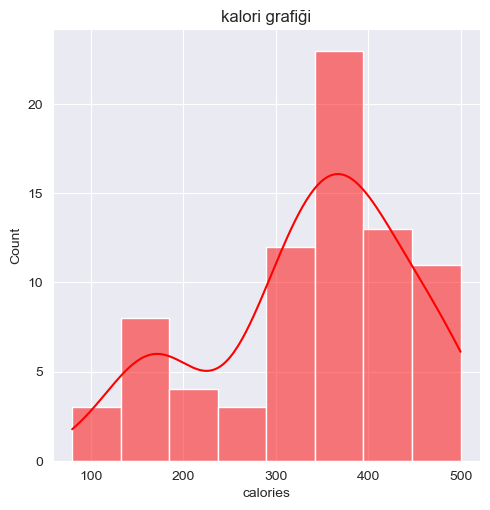

In [25]:
sns.displot(x="calories",data=df,color="red",kde=True)
plt.title("kalori grafiği")
plt.show()
#kde=True: Histogramın üzerine bir yoğunluk tahmini (Kernel Density Estimate - KDE) eğrisi eklenmesini sağlar. Bu eğri, verilerin yoğunluğunu daha pürüzsüz ve sürekli bir şekilde gösterir.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
x=df[["calories","fat","carb","fiber","protein"]]
y=df["type"]
x

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [29]:
y

1       bakery
2       bakery
3       bakery
4       bakery
5       bakery
        ...   
73    sandwich
74    sandwich
75     parfait
76     parfait
77     parfait
Name: type, Length: 77, dtype: object

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
y_pred=model.predict(x_test)

In [33]:
accuracy=accuracy_score(y_test,y_pred)

In [34]:
print("doğruluk",accuracy)

doğruluk 0.6875


In [39]:
prediction=model.predict([[300,3,60,3,7]])
print(prediction)

['parfait']


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

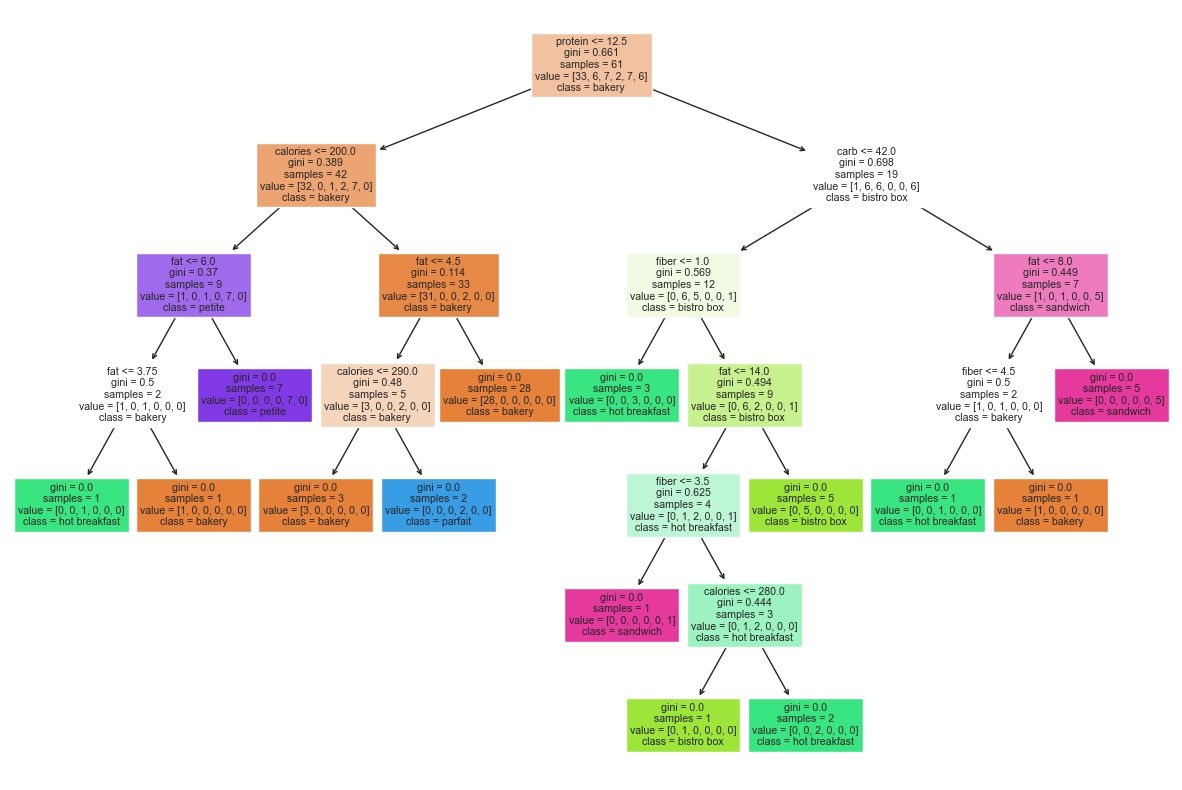

In [44]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=x.columns,class_names=model.classes_,filled=True)
plt.show()
#plot_tree(model, feature_names=x.columns, class_names=model.classes_, filled=True): Scikit-learn kütüphanesindeki plot_tree fonksiyonu kullanılarak karar ağacını çizer.
model: Görselleştirilmek istenen eğitimli karar ağacı modelidir.
feature_names=x.columns: Özellik isimlerini belirler. Bu, karar ağacındaki düğümlerde hangi özelliklerin kullanıldığını anlamaya yardımcı olur.
class_names=model.classes_: Sınıf isimlerini belirler. Bu, karar ağacındaki yapraklarda hangi sınıfların temsil edildiğini gösterir.
filled=True: Düğümlerin sınıflarına göre renklendirilmesini sağlar. Bu, ağacın görselleştirilmesini kolaylaştırır ve hangi sınıfların nerede olduğunu anlamayı sağlar.
    